In [43]:
%matplotlib inline

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import sem

In [5]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [6]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
faces.images.shape

(400, 64, 64)

In [8]:
faces.data.shape

(400, 4096)

In [9]:
faces.target.shape

(400,)

In [10]:
np.min(faces.data), np.max(faces.data), np.mean(faces.data)

(0.0, 1.0, 0.5470426)

In [11]:
def print_faces(images, target, top_n):
    # Set up the figure size in inches.
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # Plot the images in a matrix of 20x20.
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # Label the image with the target value.
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

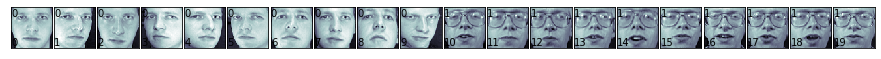

In [12]:
print_faces(faces.images, faces.target, 20)

In [13]:
# The kernel function is like a similarity measure between instances.
# The default kernel is rbf, which allows us to model nonlinear problems.
svc_1 = SVC(kernel='linear') # Start with the simplest kernel, the linear kernel.

In [14]:
def evaluate_cross_validation(clf, X, y, k=5):
    # Create a k-fold cross validation iterator.
    cv = KFold(k, shuffle=True, random_state=0)
    
    # By default, the score used is the one returned by score method
    # of the estimator(accuracy).
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    return f'Mean score: {np.mean(scores):.3f} (+/-{sem(scores):.3f}))'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, 
                                                    faces.target,
                                                    test_size=0.25,
                                                    random_state=0)

In [16]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]


'Mean score: 0.913 (+/-0.012))'

## Inference

Cross validation with five folds obtains pretty good results (accuracy of 0.91).

In [17]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    
    print('Accuracy on training set:')
    print(clf.score(X_train, y_train))
    
    print('Accuracy on testing set:')
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print('Classification report:')
    print(metrics.classification_report(y_test, y_pred))

    print('Confusion matrix:')
    print(metrics.confusion_matrix(y_test, y_pred))

In [18]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

In [19]:
# The index ranges of images of people with glasses.

glasses = [
    (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
    (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
]

In [20]:
def create_target(segments):
    # Create a new y array of target size initialized with zeros.
    y = np.zeros(faces.target.shape[0])
    
    # Put 1 for the specified segments.
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [23]:
target_glasses = create_target(glasses)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, 
                                                    target_glasses, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [25]:
svc_2 = SVC(kernel='linear')

In [26]:
evaluate_cross_validation(svc_2, X_train, y_train, 5)

[1.         0.95       0.98333333 0.98333333 0.93333333]


'Mean score: 0.970 (+/-0.012))'

In [27]:
# We obtain a mean accuracy of 0.97 with cross-validation if we evaluate on our testing set.

In [32]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion matrix:
[[66  1]
 [ 0 33]]


In [33]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]
y_test.shape

(10,)

In [34]:
select = np.ones(target_glasses.shape[0])

In [35]:
select[30:40] = 0

In [36]:
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]
y_train.shape

(390,)

In [37]:
svc_3 = SVC(kernel='linear')

In [38]:
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion matrix:
[[5 0]
 [1 4]]


In [39]:
# How to read the confusion matrix? TP, FP, FN, TN.
# In the example above, we have 10 data and only 1 image has been incorrectly classified.

In [41]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]

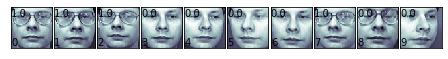

In [42]:
print_faces(eval_faces, y_pred, 10)

## Text classification with Naive Bayes

In [87]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

from scipy.stats import sem

In [46]:
news = fetch_20newsgroups(subset='all')

In [47]:
type(news.data), type(news.target), type(news.target_names)

(list, numpy.ndarray, list)

In [48]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [50]:
len(news.data), len(news.target)

(18846, 18846)

In [51]:
news.data[0], news.target[0], news.target_names[news.target[0]]

("From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 10,
 'rec.sport.hockey')

In [52]:
SPLIT_PERC = 0.75

split_size = int(len(news.data) * SPLIT_PERC)
X_train, X_test = news.data[:split_size], news.data[split_size:]
y_train, y_test = news.target[:split_size], news.target[split_size:]

In [57]:
clf_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [69]:
clf_2 = Pipeline([
    ('vect', HashingVectorizer(alternate_sign=False)), # Input X must be non-negative!
    ('clf', MultinomialNB())
])

In [70]:
clf_3 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [71]:
def evaluate_cross_validation(clf, X, y, k=5):
    # Create a k-fold cross validation iterator of k=5 folds.
    cv = KFold(k, shuffle=True, random_state=0)
    
    # By default, the score used is the one returned by score method of the estimator (accuracy).
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print(f'Means scores: {np.mean(scores):.3f} (+/-{sem(scores):.3f})')

In [72]:
clfs = [clf_1, clf_2, clf_3]
for clf in clfs:
    evaluate_cross_validation(clf, news.data, news.target, 5)

[0.85782493 0.85725657 0.84664367 0.85911382 0.8458477 ]
Means scores: 0.853 (+/-0.003)
[0.75517241 0.77659857 0.77076148 0.78508888 0.76200584]
Means scores: 0.770 (+/-0.005)
[0.84482759 0.85990979 0.84558238 0.85990979 0.84213319]
Means scores: 0.850 (+/-0.004)


In [77]:
# Attempt to improve the results by trying to parse the text documents into tokens with a different regular expression.
clf_4 = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('clf', MultinomialNB())
])

In [80]:
evaluate_cross_validation(clf_4, news.data, news.target, 5)

[0.86100796 0.8718493  0.86203237 0.87291059 0.8588485 ]
Means scores: 0.865 (+/-0.003)


In [ ]:
# We have a slight improvement from 0.86 to 0.87.

In [83]:
clf_5 = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",
                             stop_words='english')),
    ('clf', MultinomialNB())
])

In [84]:
evaluate_cross_validation(clf_5, news.data, news.target, 5)

[0.88116711 0.89519767 0.88325816 0.89227912 0.88113558]
Means scores: 0.887 (+/-0.003)


In [85]:
clf_6 = Pipeline([
    ('vect', TfidfVectorizer(token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",
                             stop_words='english')),
    ('clf', MultinomialNB(alpha=0.01)) # Default value is 1.
])

In [86]:
evaluate_cross_validation(clf_6, news.data, news.target, 5)

[0.9204244  0.91960732 0.91828071 0.92677103 0.91854603]
Means scores: 0.921 (+/-0.002)


In [89]:
# ^ We have boosted the performance from 0.88 to 0.92!

In [93]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    
    print('Accuracy on training set:')
    print(clf.score(X_train, y_train))
    
    print('Accuracy on testing set:')
    print(clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)
    
    print('Classification report:')
    print(metrics.classification_report(y_test, y_pred))
    
    print('Confusion matrix:')
    print(metrics.confusion_matrix(y_test, y_pred))    

In [94]:
train_and_evaluate(clf_6, X_train, X_test, y_train, y_test)

Accuracy on training set:
0.9969576906749682
Accuracy on testing set:
0.9178692699490663
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       216
           1       0.85      0.85      0.85       246
           2       0.91      0.84      0.87       274
           3       0.81      0.86      0.83       235
           4       0.88      0.90      0.89       231
           5       0.89      0.91      0.90       225
           6       0.88      0.80      0.84       248
           7       0.92      0.93      0.93       275
           8       0.96      0.98      0.97       226
           9       0.97      0.94      0.96       250
          10       0.97      1.00      0.98       257
          11       0.97      0.97      0.97       261
          12       0.90      0.91      0.91       216
          13       0.94      0.95      0.95       257
          14       0.94      0.97      0.95       246
          15       0.90

In [96]:
# Take a look into the tokens that have been used to create our dictionary.
clf_6.named_steps['vect'].get_feature_names()[:10]

['...and',
 '0-.66d8wt',
 '0-04g55',
 '0-100mph',
 '0-13-117441-x--or',
 '0-3mb',
 '0-40mb',
 '0-40volts',
 '0-5mb',
 '0-60mph']

## Explaining Titanic Hypothesis with Decision Tree

In [252]:
import csv
import graphviz
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn import tree, metrics
from scipy.stats import sem

In [195]:
filename = '../data/titanic.txt'

with open(filename, 'r') as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    # Header contains feature name.
    row = next(titanic_reader)
    feature_names = np.array(row)
    
    # Load dataset and target classes.
    titanic_X, titanic_y = [], []
    for row in titanic_reader:
        titanic_X.append(row)
        titanic_y.append(row[2]) # The target value is "survived".
    
    titanic_X = np.array(titanic_X)
    titanic_y = np.array(titanic_y)

In [196]:
titanic_X.shape, titanic_y.shape

((1313, 11), (1313,))

In [197]:
feature_names

array(['row.names', 'pclass', 'survived', 'name', 'age', 'embarked',
       'home.dest', 'room', 'ticket', 'boat', 'sex'], dtype='<U9')

In [198]:
titanic_X[0], titanic_y[0]

(array(['1', '1st', '1', 'Allen, Miss Elisabeth Walton', '29.0000',
        'Southampton', 'St Louis, MO', 'B-5', '24160 L221', '2', 'female'],
       dtype='<U62'), '1')

In [199]:
# We keep class, age and sex.
titanic_X = titanic_X[:, [1,4,10]]
feature_names = feature_names[[1,4,10]]

In [200]:
feature_names

array(['pclass', 'age', 'sex'], dtype='<U9')

In [201]:
titanic_X[12], titanic_y[12]

(array(['1st', 'NA', 'female'], dtype='<U62'), '1')

In [202]:
# ^ We have a missing value.

In [203]:
ages = titanic_X[:, 1]

In [204]:
mean_age = np.mean(titanic_X[ages != 'NA', 1].astype(np.float))

In [205]:
mean_age

31.19418104265403

In [206]:
# Replace the missing values with the mean.
titanic_X[titanic_X[:, 1] == 'NA', 1] = mean_age

### Using LabelEncoder

In [207]:
# Encode sex.
enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 2]) # Third column is sex.
label_encoder.classes_

array(['female', 'male'], dtype='<U62')

In [208]:
integer_classes = label_encoder.transform(label_encoder.classes_)
integer_classes

array([0, 1])

In [209]:
t = label_encoder.transform(titanic_X[:, 2])
titanic_X[:, 2] = t

In [210]:
feature_names

array(['pclass', 'age', 'sex'], dtype='<U9')

In [211]:
titanic_X[12], titanic_y[12]

(array(['1st', '31.19418104265403', '0'], dtype='<U62'), '1')

### Using OneHotEncoder

In [214]:
# Creates a new sparse matrix with three columns, each one indicating if the instance belong to the class.
enc = OneHotEncoder()
enc.fit_transform(titanic_X[:, 0].reshape(-1, 1))
new_features = enc.transform(titanic_X[:,0].reshape(-1, 1)).toarray()
new_features.shape

(1313, 3)

In [215]:
# Add the new features to titanic_X.
titanic_X = np.concatenate([titanic_X, new_features], axis=1)
titanic_X.shape

(1313, 6)

In [216]:
# Eliminate converted columns.
titanic_X = np.delete(titanic_X, [0], 1)
titanic_X.shape

(1313, 5)

In [217]:
# Update feature names.
feature_names = ['age', 'sex', 'first_class', 'second_class', 'third_class']

In [220]:
# Convert to numerical values.
titanic_X = titanic_X.astype(np.float64)
titanic_y = titanic_y.astype(np.float64)

In [221]:
titanic_X[0], titanic_y[0]

(array([29.,  0.,  1.,  0.,  0.]), 1.0)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, 
                                                    test_size=0.25, 
                                                    random_state=33)

In [225]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_leaf=5)

In [228]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [245]:
# dot_data = StringIO()
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=feature_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

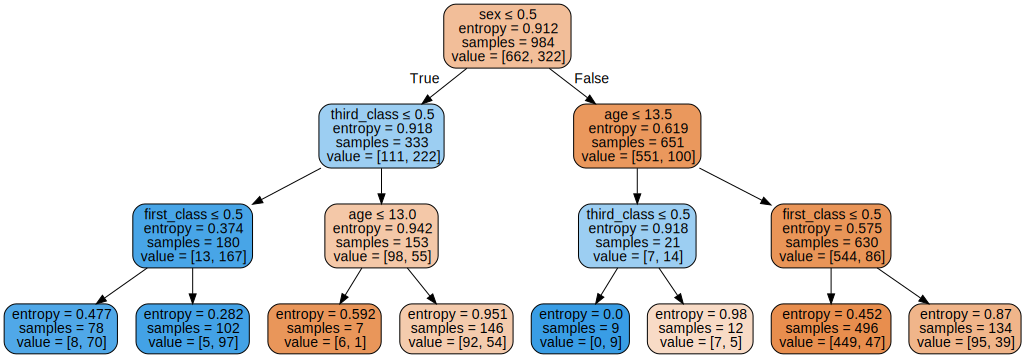

In [246]:
graph = graphviz.Source(dot_data)
# graph.render('titanic')
graph

In [248]:
def measure_performance(X, y, clf, 
                        show_accuracy=True,
                        show_classification_report=True,
                        show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print(f'Accuracy: {metrics.accuracy_score(y, y_pred):.3f}')
    
    if show_classification_report:
        print('Classification report:')
        print(metrics.classification_report(y, y_pred))
        
    if show_confusion_matrix:
        print('Confusion matrix:')
        print(metrics.confusion_matrix(y, y_pred))

In [249]:
measure_performance(X_train, y_train, clf)

Accuracy: 0.838
Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       662
         1.0       0.93      0.55      0.69       322

    accuracy                           0.84       984
   macro avg       0.87      0.76      0.79       984
weighted avg       0.85      0.84      0.82       984

Confusion matrix:
[[649  13]
 [146 176]]


In [258]:
def loo_cv(X_train, y_train, clf):
    # Perform leave-one-out cross validation.
    loo = LeaveOneOut()
    scores = np.zeros(X_train[:].shape[0])
    for train_index, test_index in loo.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        clf = clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)
        scores[test_index] = metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))
    
    print(f'Mean score: {np.mean(scores):.3f} (+/-{sem(scores):.3f})')

In [259]:
loo_cv(X_train, y_train, clf)

Mean score: 0.837 (+/-0.012)


## Random Forest - Randomizing Decisions

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
clf = RandomForestClassifier(n_estimators=10, random_state=33)
clf.fit(X_train, y_train)
loo_cv(X_train, y_train, clf)

Mean score: 0.817 (+/-0.012)


In [263]:
## ^ The scores are worse for random forest. Introducing randomization is not a good idea because the number
# of features was too small.

In [264]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf_dt.fit(X_train, y_train)
measure_performance(X_test, y_test, clf_dt)

Accuracy: 0.793
Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85       202
         1.0       0.88      0.54      0.67       127

    accuracy                           0.79       329
   macro avg       0.82      0.75      0.76       329
weighted avg       0.81      0.79      0.78       329

Confusion matrix:
[[193   9]
 [ 59  68]]
